# VolgaCTF Quals 2018 - Black&White


## Flavor Text

> Pull your pushed flag.

## Files
* [lena.tif](lena.tif)
* [embed.tif](lena.tif)

## Hints
1. [task.py](task.py) might be of some help.

## Initial Analysis

The organizers have provided us with a couple of image files: one is a greyscale photo of Lena, and the other looks like a dithered version of the same image with fewer shades. Both images have the same dimensions (512x512), so it's pretty likely that we only need to be concerned with color info.

Let's get started by confirming the color values for each image:

In [1]:
import seaborn as sns
import scipy.misc as scmisc
from matplotlib.pyplot import imshow
%matplotlib inline

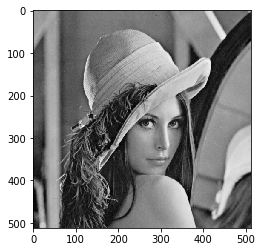

In [2]:
C = scmisc.imread('lena.tif')
imshow(C, cmap='gray')

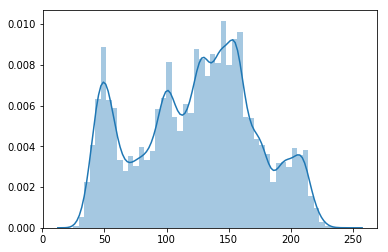

In [3]:
# Histogram of gray values in lena.tif
sns.distplot(C.flatten())

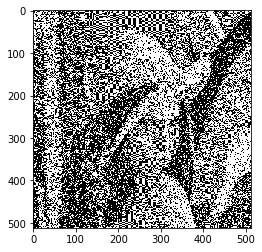

In [4]:
# n.b. imshow doesn't render embed.tif very well.This looks lot better in a real image viewer.
CW = scmisc.imread('embed.tif')
imshow(CW, cmap='gray')

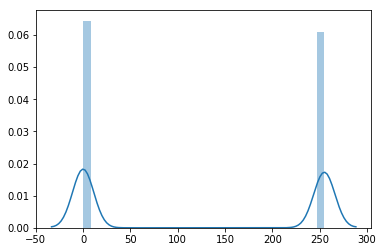

In [5]:
sns.distplot(CW.flatten())

## Interpreting the Results

So from here, it looks like embed.tif is a copy of lena.tif that has somehow been dithered down to literally just black and white (with no gray values in between). Since we only have two discrete values, we can treat the pixel values as 0s and 1s, which we can trivially apply a bitwise XOR against. The hints from the organizers confirm this if you go through task.py.

If we dither lena.tif ourselves (without the embedded flag data), we should be able apply a pixel-by-pixel xor to get the dithered lena pixels to cancel out with the ones in embed.tif and leave us with the flag image. The most well-known algorithm for dithering is probably [Floyd-Steinberg](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering), so we can try using that first.

If you want to try implementing this yourself, you can stop here; otherwise, continue onto [BlackAndWhite.ipynb](BlackAndWhite.ipynb).